In [1]:
import numpy as np

raw_data = np.genfromtxt('../data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

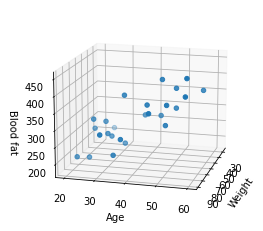

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [5]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)

In [6]:
x_data.shape, y_data.shape

((25, 2), (25,))

In [7]:
y_data = y_data.reshape((25, 1))
y_data.shape

(25, 1)

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

In [9]:
model.compile(optimizer='rmsprop', loss='mse')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 3ms/step - loss: 174153.2031
Epoch 2/5000
1/1 [==============================] - 0s 2ms/step - loss: 174043.0000
Epoch 3/5000
1/1 [==============================] - 0s 2ms/step - loss: 173935.2031
Epoch 4/5000
1/1 [==============================] - 0s 2ms/step - loss: 173829.5625
Epoch 5/5000
1/1 [==============================] - 0s 2ms/step - loss: 173725.7031
Epoch 6/5000
1/1 [==============================] - 0s 999us/step - loss: 173623.3750
Epoch 7/5000
1/1 [==============================] - 0s 2ms/step - loss: 173522.4062
Epoch 8/5000
1/1 [==============================] - 0s 2ms/step - loss: 173422.5781
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 173323.7812
Epoch 10/5000
1/1 [==============================] - 0s 998us/step - loss: 173225.8750
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 173128.7656
Epoch 12/5000
1/1 [==============================] - 0s 2ms/step - los

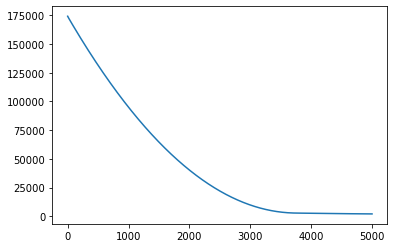

In [13]:
plt.plot(hist.history['loss'])

In [14]:
model.predict(np.array([100,44]).reshape(1, 2))

array([[390.22443]], dtype=float32)

In [15]:
model.predict(np.array([60,25]).reshape(1, 2))

array([[230.11792]], dtype=float32)

In [17]:
# 가중치
W_, b_ = model.get_weights()
W_, b_

(array([[1.964834],
        [4.290167]], dtype=float32),
 array([4.9737077], dtype=float32))

In [18]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_

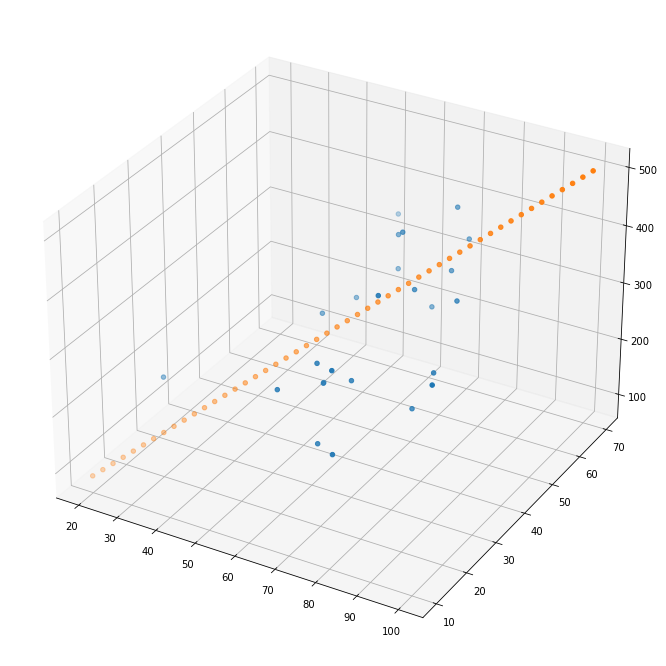

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y, Z)
plt.show()
